<a href="https://colab.research.google.com/github/Darshan99225/Linear-Regression-Health-Costs-Calculator/blob/main/predict_health_costs_with_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2024-06-02 09:12:13--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.2.33, 172.67.70.149, 104.26.3.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.2.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  49.09K  --.-KB/s    in 0.01s   

2024-06-02 09:12:14 (4.62 MB/s) - ‘insurance.csv’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [3]:
df = dataset
df["sex"] = pd.factorize(df["sex"])[0]
df["region"] = pd.factorize(df["region"])[0]
df["smoker"] = pd.factorize(df["smoker"])[0]
dataset = df
dataset.head()


,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,0,0,16884.92
1,18,1,33.8,1,1,1,1725.55
2,28,1,33.0,3,1,1,4449.46
3,33,1,22.7,0,1,2,21984.47
4,32,1,28.9,0,1,2,3866.86


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [4]:
test_dataset = dataset.sample(frac=0.2)
len(test_dataset)
train_dataset = dataset[~dataset.isin(test_dataset)].dropna()
len(train_dataset)

1070

In [5]:
train_dataset.head()

,age,sex,bmi,children,smoker,region,expenses
1,18.0,1.0,33.8,1.0,1.0,1.0,1725.55
3,33.0,1.0,22.7,0.0,1.0,2.0,21984.47
4,32.0,1.0,28.9,0.0,1.0,2.0,3866.86
5,31.0,0.0,25.7,0.0,1.0,1.0,3756.62
8,37.0,1.0,29.8,2.0,1.0,3.0,6406.41


In [6]:
train_labels = train_dataset.pop("expenses")
train_labels.head()
train_dataset.head()

,age,sex,bmi,children,smoker,region
1,18.0,1.0,33.8,1.0,1.0,1.0
3,33.0,1.0,22.7,0.0,1.0,2.0
4,32.0,1.0,28.9,0.0,1.0,2.0
5,31.0,0.0,25.7,0.0,1.0,1.0
8,37.0,1.0,29.8,2.0,1.0,3.0


In [7]:
test_labels = test_dataset.pop("expenses")
test_labels.head()

186      3981.98
1217     4058.12
399      1631.67
981      4500.34
689     34806.47
Name: expenses, dtype: float64

In [8]:
test_dataset.head()

,age,sex,bmi,children,smoker,region
186,26,0,29.9,2,1,1
1217,29,1,37.3,2,1,1
399,18,0,38.2,0,1,1
981,34,1,21.4,0,1,3
689,27,1,31.1,1,0,1


In [9]:
normalizer = layers.experimental.preprocessing.Normalization()
normalizer.adapt(np.array(train_dataset))

model = keras.Sequential([
    normalizer,
    layers.Dense(16),
    layers.Dense(4),
    layers.Dropout(.2),
    layers.Dense(1),
])
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mae',
    metrics=['mae', 'mse']
)
model.build()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 6)                 13        
 on)                                                             
                                                                 
 dense (Dense)               (None, 16)                112       
                                                                 
 dense_1 (Dense)             (None, 4)                 68        
                                                                 
 dropout (Dropout)           (None, 4)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 198 (796.00 Byte)
Trainable params: 185 (740.00 Byte)
Non-trainable params: 13 (56.00 Byte)
________________

In [10]:
history = model.fit(
    train_dataset,
    train_labels,
    epochs=100,
    validation_split=0.5,
    verbose=0, # disable logging
)

print(history)

9/9 - 0s - loss: 3662.4507 - mae: 3662.4507 - mse: 38165548.0000 - 61ms/epoch - 7ms/step
Testing set Mean Abs Error: 3662.45 expenses
The Mean Abs Error must be less than 3500. Keep trying.
9/9 [==============================] - 0s 2ms/step


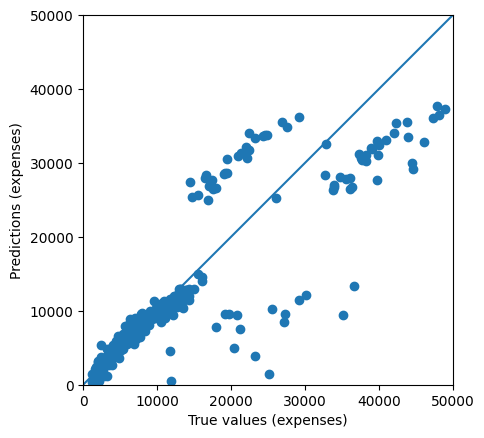

In [11]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
